In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Dear Community I feel compel...
1,✅ Trip Verified | Quick bag drop at First Win...
2,✅ Trip Verified | 4 Hours before takeoff we r...
3,✅ Trip Verified | I recently had a delay on B...
4,"Not Verified | Boarded on time, but it took a..."


In [5]:
df.reviews=df.reviews.str.split('|',expand=True)[1]
df.head()

,reviews
0,Dear Community I feel compelled to share the ...
1,Quick bag drop at First Wing but too many pa...
2,4 Hours before takeoff we received a Mail st...
3,I recently had a delay on British Airways fr...
4,"Boarded on time, but it took ages to get to ..."


In [6]:
import re
def clean(text):
    text=re.sub('[^A-Za-z]+',' ',str(text))
    return text

df['clean reviews']=df['reviews'].apply(clean)
df.head()

,reviews,clean reviews
0,Dear Community I feel compelled to share the ...,Dear Community I feel compelled to share the ...
1,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...
2,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...
3,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...
4,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...


In [7]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\PALLAVI
[nltk_data]     MADDULA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\PALLAVI
[nltk_data]     MADDULA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\PALLAVI
[nltk_data]     MADDULA\AppData\Roaming\nltk_data...


In [8]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['clean reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\PALLAVI
[nltk_data]     MADDULA\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PALLAVI MADDULA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,clean reviews,POS tagged
0,Dear Community I feel compelled to share the ...,Dear Community I feel compelled to share the ...,"[(Dear, n), (Community, n), (feel, v), (compel..."
1,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...,"[(Quick, n), (bag, n), (drop, n), (First, n), ..."
2,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...,"[(Hours, n), (takeoff, n), (received, v), (Mai..."
3,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...,"[(recently, r), (delay, n), (British, a), (Air..."
4,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[(Boarded, v), (time, n), (took, v), (ages, n)..."


In [9]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,clean reviews,POS tagged,Lemma
0,Dear Community I feel compelled to share the ...,Dear Community I feel compelled to share the ...,"[(Dear, n), (Community, n), (feel, v), (compel...",Dear Community feel compel share utter frust...
1,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...,"[(Quick, n), (bag, n), (drop, n), (First, n), ...",Quick bag drop First Wing many passenger use...
2,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...,"[(Hours, n), (takeoff, n), (received, v), (Mai...",Hours takeoff receive Mail state cryptic mes...
3,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...,"[(recently, r), (delay, n), (British, a), (Air...",recently delay British Airways BRU LHR due s...
4,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[(Boarded, v), (time, n), (took, v), (ages, n)...",Boarded time take age get runway due congest...


In [10]:
pip install vaderSentiment

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     -------------------------------------  122.9/126.0 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 126.0/126.0 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,clean reviews,POS tagged,Lemma,Sentiment,Analysis
0,Dear Community I feel compelled to share the ...,Dear Community I feel compelled to share the ...,"[(Dear, n), (Community, n), (feel, v), (compel...",Dear Community feel compel share utter frust...,-0.9681,Negative
1,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...,"[(Quick, n), (bag, n), (drop, n), (First, n), ...",Quick bag drop First Wing many passenger use...,0.9806,Positive
2,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...,"[(Hours, n), (takeoff, n), (received, v), (Mai...",Hours takeoff receive Mail state cryptic mes...,-0.8046,Negative
3,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...,"[(recently, r), (delay, n), (British, a), (Air...",recently delay British Airways BRU LHR due s...,-0.7165,Negative
4,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[(Boarded, v), (time, n), (took, v), (ages, n)...",Boarded time take age get runway due congest...,0.4404,Neutral


In [12]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    480
Negative    413
Neutral     107
Name: count, dtype: int64

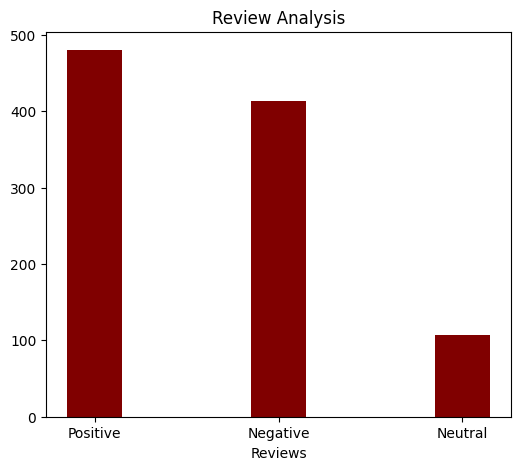

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (6,5))

# creating the bar plot
plt.bar(vader_counts.index,vader_counts.values, color ='maroon',
        width = 0.3)

plt.xlabel("Reviews")
plt.title("Review Analysis")
plt.show()


In [14]:
df.to_csv("BA_reviews.csv")

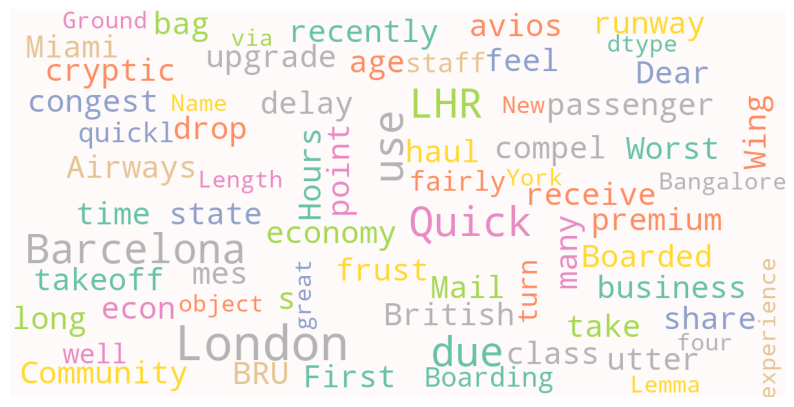

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='snow',
        stopwords=stopwords,
        max_words=120,
        max_font_size=25,
        scale=3,
        colormap='Set2',
        random_state=0)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

In [16]:
pip install wordCloud


   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ------- ------------------------------- 30.7/151.4 kB 660.6 kB/s eta 0:00:01
   ------------------------------------- -- 143.4/151.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 1.5 MB/s eta 0:00:00
